In [72]:
import pandas as pd

#### Loading Data

In [73]:
df = pd.read_csv("retail.csv")

In [74]:
df

,User ID,Product ID,Product Category,Purchase Date,Rating
0,30.0,100.0,Electronics,05-02-2023,3.7
1,33.0,101.0,Clothing,11-07-2023,2.0
2,3.0,102.0,Clothing,23-03-2023,4.1
3,39.0,103.0,Books,15-03-2023,3.2
4,40.0,104.0,Electronics,27-11-2022,4.7
...,...,...,...,...,...
197,46.0,297.0,Books,02-02-2023,3.1
198,13.0,298.0,Electronics,28-06-2023,3.5
199,13.0,299.0,Clothing,11-02-2023,4.9
200,NaN,NaN,NaN,16-12-2022,NaN


#### Analyzing Data

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User ID           200 non-null    float64
 1   Product ID        200 non-null    float64
 2   Product Category  200 non-null    object 
 3   Purchase Date     202 non-null    object 
 4   Rating            200 non-null    float64
dtypes: float64(3), object(2)
memory usage: 8.0+ KB


In [76]:
df.describe()

,User ID,Product ID,Rating
count,200.000000,200.000000,200.000000
mean,25.575000,199.500000,3.057000
std,14.156142,57.879185,1.198639
min,1.000000,100.000000,1.100000
25%,14.000000,149.750000,2.075000
50%,26.000000,199.500000,3.150000
75%,38.000000,249.250000,4.100000
max,50.000000,299.000000,5.000000


In [77]:
user_purchase_counts = df.groupby('User ID').size()

In [78]:
user_purchase_counts.describe()

count    50.000000
mean      4.000000
std       1.884415
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
dtype: float64

In [79]:
product_popularity = df.groupby('Product ID').size()

In [80]:
product_popularity.describe()

count    200.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
dtype: float64

#### Exploratory Data Analysis (EDA)

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

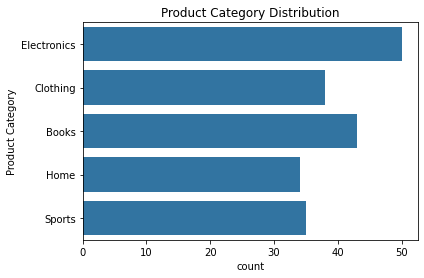

In [84]:
sns.countplot(df['Product Category']) 
plt.title('Product Category Distribution') 
plt.show()

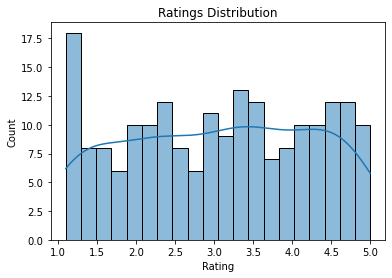

In [86]:
sns.histplot(df['Rating'], bins=20, kde=True) 
plt.title('Ratings Distribution') 
plt.show()

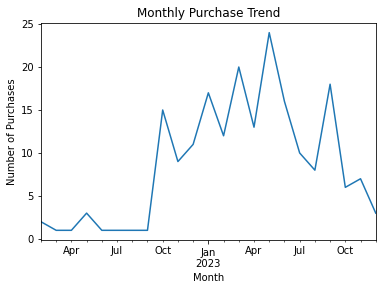

In [87]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date']) 
df.set_index('Purchase Date', inplace=True) 
df['Product ID'].resample('M').count().plot() 
plt.title('Monthly Purchase Trend') 
plt.xlabel('Month') 
plt.ylabel('Number of Purchases') 
plt.show()

#### Data Preprocessing

In [49]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [50]:
df = pd.get_dummies(df, columns=['Product Category'], drop_first=True)

In [51]:
df

,User ID,Product ID,Purchase Date,Rating,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Product Category_Sports
0,30.0,100.0,2023-05-02,3.7,0,1,0,0
1,33.0,101.0,2023-11-07,2.0,1,0,0,0
2,3.0,102.0,2023-03-23,4.1,1,0,0,0
3,39.0,103.0,2023-03-15,3.2,0,0,0,0
4,40.0,104.0,2022-11-27,4.7,0,1,0,0
...,...,...,...,...,...,...,...,...
197,46.0,297.0,2023-02-02,3.1,0,0,0,0
198,13.0,298.0,2023-06-28,3.5,0,1,0,0
199,13.0,299.0,2023-11-02,4.9,1,0,0,0
200,NaN,NaN,2022-12-16,NaN,0,0,0,0


In [52]:
df.fillna(method='ffill', inplace=True)

In [53]:
df

,User ID,Product ID,Purchase Date,Rating,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Product Category_Sports
0,30.0,100.0,2023-05-02,3.7,0,1,0,0
1,33.0,101.0,2023-11-07,2.0,1,0,0,0
2,3.0,102.0,2023-03-23,4.1,1,0,0,0
3,39.0,103.0,2023-03-15,3.2,0,0,0,0
4,40.0,104.0,2022-11-27,4.7,0,1,0,0
...,...,...,...,...,...,...,...,...
197,46.0,297.0,2023-02-02,3.1,0,0,0,0
198,13.0,298.0,2023-06-28,3.5,0,1,0,0
199,13.0,299.0,2023-11-02,4.9,1,0,0,0
200,13.0,299.0,2022-12-16,4.9,0,0,0,0


#### Collaborative Filtering

In [54]:
user_item_matrix = df.pivot_table(index='User ID', columns='Product ID', values='Rating').fillna(0)

In [55]:
user_item_matrix

Product ID,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,...,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0
User ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.3,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.7,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cosine Similarity

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
product_similarity = cosine_similarity(user_item_matrix.T)

In [58]:
product_similarity_df = pd.DataFrame(product_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [59]:
product_similarity_df

Product ID,100.0,101.0,102.0,103.0,104.0,105.0,106.0,107.0,108.0,109.0,...,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0
Product ID,,,,,,,,,,,,,,,,,,,,,
100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
103.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
296.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
297.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
user_item_matrix.columns = user_item_matrix.columns.astype(int)
product_similarity_df.index = product_similarity_df.index.astype(int)
product_similarity_df.columns = product_similarity_df.columns.astype(int)

#### Recommendation function

In [61]:
def recommend_products(product_id, num_recommendations):
    if product_id not in product_similarity_df.index:
        print("Product not found in the dataset.")
        return []
    similar_products = product_similarity_df[product_id].sort_values(ascending=False)[1:num_recommendations+1]
    return similar_products.index.tolist()

In [62]:
recommend_products(105, num_recommendations=7)

[216, 105, 244, 279, 172, 111, 229]

#### Split the data into training and test sets

In [63]:
train_data = user_item_matrix.sample(frac=0.8, random_state=42)
test_data = user_item_matrix.drop(train_data.index)

#### Evaluate RMSE for product recommendations

In [64]:
def rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [66]:
pred_ratings = cosine_similarity(train_data.T)
rmse(pred_ratings, test_data.values)

3.2640903348843935

#### Building an API

In [67]:
from fastapi import FastAPI
app = FastAPI()

In [37]:
@app.get("/recommend/{product_id}")
def recommend(product_id: int, num_recommendations: int = 5):
    recommendations = recommend_products(product_id, num_recommendations)
    return {"product_id": product_id, "recommendations": recommendations}